# Sales_Analysis

### In this notebook I use Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 

### import usefull libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

<br></br>
### concate the files

#### Sales Data are devided into 12 months, so first we need to concate all the data from different csv files by using os module

In [2]:
list = [i for i in os.listdir('./Sales_Data')]

all_month = pd.DataFrame()

for i in list:
    df = pd.read_csv('./Sales_Data/'+i)
    all_month = pd.concat([all_month, df])

all_month.head(4)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_month.shape

(186850, 6)

now this concatination may include usless rows or empty rows, for that we have to remove that rows

In [4]:
nan_df = all_month[all_month.isna().any(axis = 1)]
nan_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nan_df.shape

(545, 6)

In [6]:
all_month = all_month.dropna(how = 'all')
all_month.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_month.shape   # 186850 - 545 = 186305

(186305, 6)

## This 5 Questions can really help businesses to make dicitions

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?
st?


===========================================================================================================
<br></br>
## Question 1 : What was the best month for sales? How much was earned that month?

#### Add month column for month

In [8]:
all_month = all_month[all_month['Order Date'].str[:2] != 'Or']

In [9]:
all_month['month'] =  all_month['Order Date'].str[:2]
all_month['month'] = all_month['month'].astype('int32')
all_month.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


#### Add sales column to calculate total sales

In [10]:
# Sales is the product of Quantity ordered and Price each column
# to make sales of numeric data type, we first convert this two column into numeric

all_month['Quantity Ordered'] = pd.to_numeric(all_month['Quantity Ordered'])
all_month['Price Each'] = pd.to_numeric(all_month['Price Each'])

In [11]:
all_month['sales'] = all_month['Quantity Ordered'] * all_month['Price Each']
all_month.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [12]:
g1 = all_month.groupby('month').sum('sales')
g1

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


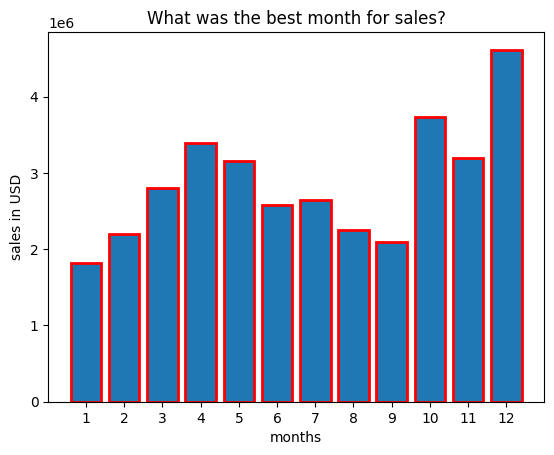

In [13]:
months = [i for i in range(1,13)]

plt.title('What was the best month for sales?')
plt.bar(months, g1.sales, edgecolor = 'r', linewidth = 2)
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('sales in USD')

plt.show()

#### ***From this graph we can say that December is the best month for sales, probably because of christmas***

===========================================================================================================
<br></br>
## Question 2 :  Which city sold the most product?

#### Add a column name city which contain city as well as state

In [14]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][1:3]

all_month['city'] = [get_city(i)+' '+get_state(i) for i in all_month['Purchase Address']]
# all_month['city'] = [get_state(i) for i in all_month['Purchase Address']]

all_month.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA


In [15]:
g2 = all_month.groupby('city').sum('sales')
g2

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


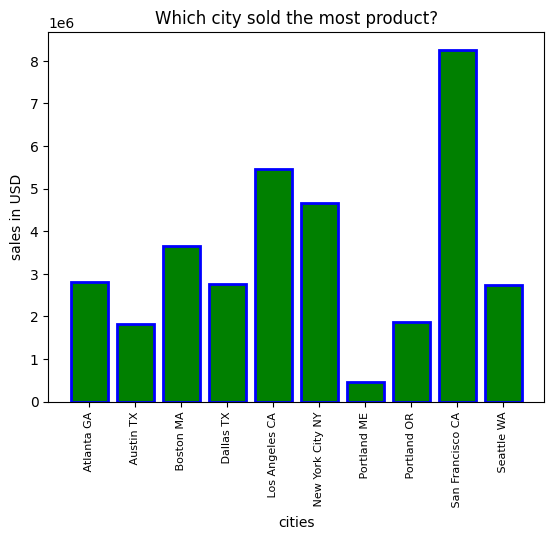

In [16]:
cities = [cities for cities, df in all_month.groupby('city')]

plt.title('Which city sold the most product?')
plt.bar(cities, g2.sales,color = 'g', edgecolor = 'b', linewidth = 2)
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('cities')
plt.ylabel('sales in USD')

plt.show()

#### ***San Francisco CA sold the most product***

===========================================================================================================
<br></br>
##  Question 3 : What time should we display advertisements to maximize the likelihood of purchases?

In [17]:
all_month['Order Date'] = pd.to_datetime(all_month['Order Date'])

C:\Users\Kalapi\AppData\Local\Temp\ipykernel_20072\27869077.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_month['Order Date'] = pd.to_datetime(all_month['Order Date'])


In [18]:
all_month['hour'] = all_month['Order Date'].dt.hour
all_month['minute'] = all_month['Order Date'].dt.minute

all_month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


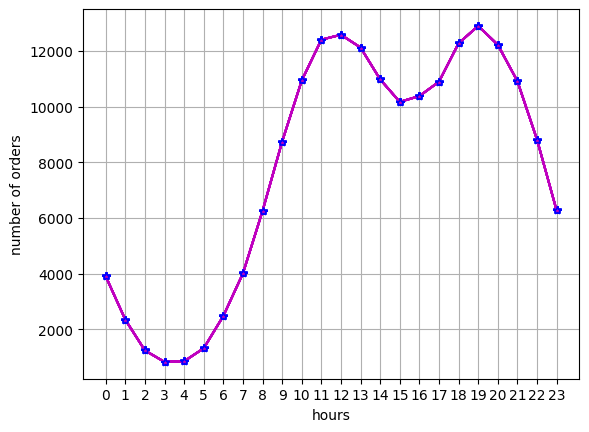

In [19]:
hours = [h for h, df in all_month.groupby('hour')]

plt.plot(hours, all_month.groupby('hour').count(), 'm-*', mec = 'b', ms = '6')
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('number of orders')

plt.grid()
plt.show()

#### ***recomendation for advertisement is around 11am and 7pm***

===========================================================================================================
<br></br>
## Question 4 :What product are most often sold together?

In [20]:
df = all_month[all_month['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df2.head(7)

C:\Users\Kalapi\AppData\Local\Temp\ipykernel_20072\2843156611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"


In [21]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

str = ' : '
for key,value in count.most_common(10):
    print(key ,str,  value)

('iPhone', 'Lightning Charging Cable')  :  1005
('Google Phone', 'USB-C Charging Cable')  :  987
('iPhone', 'Wired Headphones')  :  447
('Google Phone', 'Wired Headphones')  :  414
('Vareebadd Phone', 'USB-C Charging Cable')  :  361
('iPhone', 'Apple Airpods Headphones')  :  360
('Google Phone', 'Bose SoundSport Headphones')  :  220
('USB-C Charging Cable', 'Wired Headphones')  :  160
('Vareebadd Phone', 'Wired Headphones')  :  143
('Lightning Charging Cable', 'Wired Headphones')  :  92


#### ***For 2 iteams at a time,  <u>"iPhone and Lightning Charging Cable "</u>  is the combination of products which sold most***

===========================================================================================================
<br></br>
## Question 5 : What product sold the most? Why do you think it sold the most?

In [22]:
product_group = all_month.groupby('Product')

In [23]:
quantity_ordered = product_group['Quantity Ordered'].sum()
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

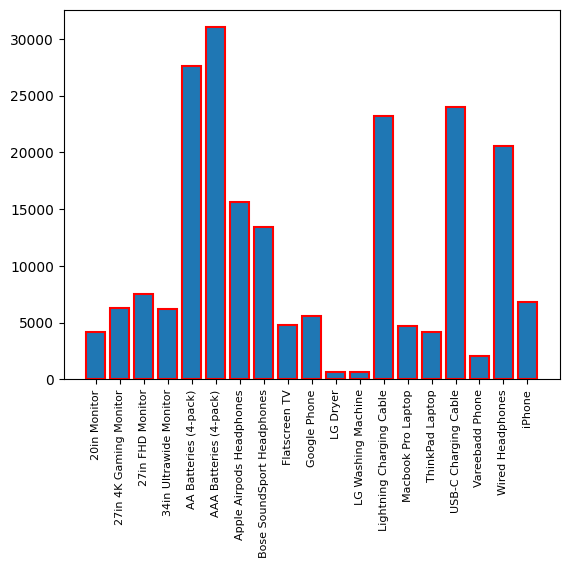

In [24]:
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered, edgecolor = 'r', linewidth = 1.5)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### <u>AAA Batteries (4-pack) and USB-C Charging Cable</u>  are the most selling product. but why ?? any corelation ??

##### try to find relation between most selling product and price, hope this will give some relation wich can help us to understand

C:\Users\Kalapi\AppData\Local\Temp\ipykernel_20072\1229775088.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Kalapi\AppData\Local\Temp\ipykernel_20072\1229775088.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


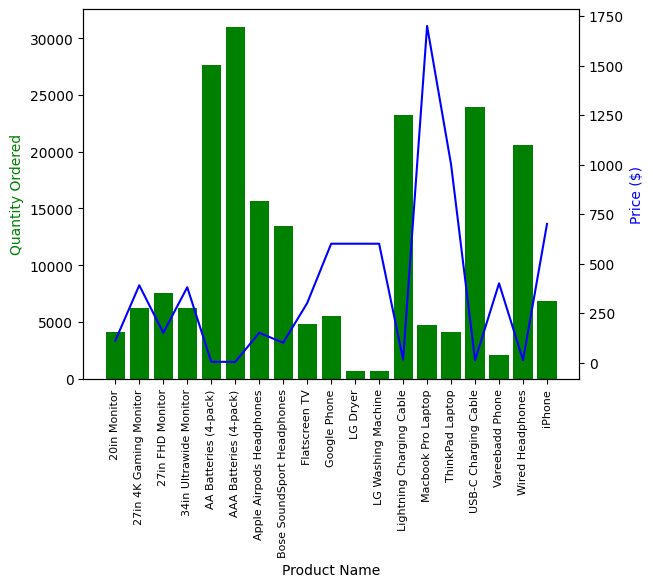

In [25]:
prices = all_month.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#### ***This grapn indicate the relation between price and sales. so we got some insights about pricing of the product***

## In this way this kind of data analysis of Sales helps a lot for businesses to make future decision

# Thankyou